# Objective

The objective of this project is to determine the traits that adults have which allow them to generate equal to or greater than $ 50k. 

We will determined what key factors are the most important in determining whether or not an adult makes more than $50K a year.

We will also note any siginificant gaps or anomolies caused by gener and race


# Method of analysis

We plan to process missing data by locating duplicates, missing vlaues and eventually removing the affected rows.

We plan to use a Regression model to be able to predict the income of an adult based on their inherent traits.

We plan on using Classification to create subgroups within the population and create numerical descriptions on the parts of the population that have different qualities in life and based on that, be able to predict their income.

We can also use Clustering to compare group preferences and understand if ethnicity affects decisions such as family or education levels.


# Columns Discriptions 

Age - describes the age of individuals.

Workclass - the employment sector of the individuals.

Fnlwgt (final weight) - sampling weight.

Education - education of the individuals.

Education_num - number of years spent in education.

Marital_status - marital status of the person.

Occupation - job title of the person.

Relationship - value associated with the family.

Race - Ethinic or racial background of the person.

Sex - gender of the indiviuals.

Capital_gain - income received in a year, apart from salary.

Capital_ loss - losses of capital incurred in a year, apart from salary.

Hours_per_week - number of work hours per week.

Native_country - home country.

Income _ whether the person makes <= 50K or >= 50K per year.


# Independent Variables and dependent variable


Our independent variables are :
Age,
Workclass,
Fnlwgt,
Education,
Education_num,
Marital_staus,
Occupation,
Relationship,
Race,
Sex,
Hours_per_week,
Native_country,

Our dependent variable is:
income

# Importing data and displaying

In [1]:
# Reading the csv file from S3 bucket
df = spark.read.csv ("s3://isaacgarciateyunbucket/adult.csv", header = True, inferSchema = True)

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1634510196140_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We placed our csv file in the S3 bucket and reading the csv file and assigning to variable named df. Our csv file has a header so we set header = True to use the first row in the csv file as the dataframe's column names and also set inferSchema = True to make Spark go through the csv file and infer the schema of each columns. 

In [2]:
# Displaying the top 20 rows of the dataset
df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+----------------+------+------------+-------------+--------------+-----------------+--------------+-----+------+------------+------------+--------------+--------------+------+
|age|       workclass|fnlwgt|   education|education.num|marital.status|       occupation|  relationship| race|   sex|capital.gain|capital.loss|hours.per.week|native.country|income|
+---+----------------+------+------------+-------------+--------------+-----------------+--------------+-----+------+------------+------------+--------------+--------------+------+
| 90|               ?| 77053|     HS-grad|            9|       Widowed|                ?| Not-in-family|White|Female|           0|        4356|            40| United-States| <=50K|
| 82|         Private|132870|     HS-grad|            9|       Widowed|  Exec-managerial| Not-in-family|White|Female|           0|        4356|            18| United-States| <=50K|
| 66|               ?|186061|Some-college|           10|       Widowed|                ?|     U

After displaying the top 20 rows of the dataset. We see that there are "?" values in some columns and the column names have "." in between instead of "-". This can be an issue later on when we start visualizing the dataset. We plan to change the column names to appropriate ones and we plan to filter out the "?" and dropping those rows to have a clean dataset. 

# Data cleaning

In [3]:
# Changing "." from column names to "_"
df_1 = df.withColumnRenamed("education.num", "education_num")\
       .withColumnRenamed("marital.status", "marital_status")\
       .withColumnRenamed("capital.gain", "capital_gain")\
       .withColumnRenamed("capital.loss", "capital_loss")\
       .withColumnRenamed("hours.per.week", "hours_per_week")\
       .withColumnRenamed("native.country", "native_country")
# Displaying the frist row
df_1.show(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+---------+------+---------+-------------+--------------+----------+-------------+-----+------+------------+------------+--------------+--------------+------+
|age|workclass|fnlwgt|education|education_num|marital_status|occupation| relationship| race|   sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+---+---------+------+---------+-------------+--------------+----------+-------------+-----+------+------------+------------+--------------+--------------+------+
| 90|        ?| 77053|  HS-grad|            9|       Widowed|         ?|Not-in-family|White|Female|           0|        4356|            40| United-States| <=50K|
+---+---------+------+---------+-------------+--------------+----------+-------------+-----+------+------------+------------+--------------+--------------+------+
only showing top 1 row

We renamed columns with appropriate names and assigning the data to new variable df_1 and displayed the first row to ensure the column names have changed to what we wanted. 

In [4]:
# Columns Discription
df_1.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- education_num: integer (nullable = true)
 |-- marital_status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital_gain: integer (nullable = true)
 |-- capital_loss: integer (nullable = true)
 |-- hours_per_week: integer (nullable = true)
 |-- native_country: string (nullable = true)
 |-- income: string (nullable = true)

Eventhough we had set inferSchema = True when reading the csv file, we printed out the schema to ensure all of our data types are correct. our dataset has correct datatypes and we conlcuded that no further treatment for datatypes is needed. 

In [5]:
# Checking exact duplicates
df_1.count(), df.distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(32561, 32537)

Before we started dropping the rows with "?" values, we wanted to check if we have any exact duplicate rows in our dataset. We printed out the count of total rows and distinct rows in our dataset. 

There are total of 32561 rows in our dataset and 24 exact duplicate rows. 

In [6]:
# Displaying exact duplicate rows
(
    df_1
    .groupby(df_1.columns)
    .count()
    .filter('count > 1')
    .show(24)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+----------------+------+------------+-------------+------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+-----+
|age|       workclass|fnlwgt|   education|education_num|    marital_status|       occupation| relationship|              race|   sex|capital_gain|capital_loss|hours_per_week|native_country|income|count|
+---+----------------+------+------------+-------------+------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+-----+
| 49|Self-emp-not-inc| 43479|Some-college|           10|Married-civ-spouse|     Craft-repair|      Husband|             White|  Male|           0|           0|            40| United-States| <=50K|    2|
| 25|         Private|195994|     1st-4th|            2|     Never-married|  Priv-house-serv|Not-in-family|             White|Female|           0|           0|            40|     Guatemala

Now, we knew that we have 24 exact duplicate rows and we decided to see what they are by filtering out where the count of the rows is greater than 1 and displayed all those 24 duplicate rows. 

In [7]:
# Dropping the exact 24 duplicated rows
new_df = df_1.dropDuplicates()
# Counting the number of rows of the new_df
new_df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

32537

We dropped the exact duplicate rows and assigning the dataset to the new variable new_df. After dropping the exact duplicate rows, our dataset is left with 32537 rows. 

In [8]:
# Dropping rows with '?' values
df_clean = new_df.filter(
    ((new_df.workclass != "?")
    & (new_df.occupation != "?")
    & (new_df.native_country != "?"))
)
# Displaying the data
df_clean.show()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+----------------+------+------------+-------------+--------------------+-----------------+--------------+------------------+------+------------+------------+--------------+--------------+------+
|age|       workclass|fnlwgt|   education|education_num|      marital_status|       occupation|  relationship|              race|   sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+---+----------------+------+------------+-------------+--------------------+-----------------+--------------+------------------+------+------------+------------+--------------+--------------+------+
| 36|         Private|224566|  Assoc-acdm|           12|       Never-married|   Prof-specialty| Not-in-family|             White|  Male|           0|        1669|            45| United-States| <=50K|
| 66|       Local-gov|174486|   Doctorate|           16|  Married-civ-spouse|   Prof-specialty|       Husband|             Black|  Male|       20051|           0|            35|       Jamaica|  >50K|


Previously we had noticed that workclass, occupation, and native_country columns has "?" values. We filtered out the rows containiing "?" values and assigning the dataset to the new variable df_clean. 

In [9]:
# Displaying the number of rows left
df_clean.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

30139

We wanted to ensure our new data, df_clean does not contain any "?" values by couting the total rows of the dataset. Now, we have left 30139 rows. We filtered out total of approximately 2398 rows with "?"values. 

# Discriptive Statistic

In [10]:
# Temporarily dropping categorial Columns for discriptive statistic
temp_df = df_clean. drop("workclass","education","marital_status","occupation","relationship", "race", "sex", "native_country","income")
# Displaying the first row of the data. 
temp_df.show(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+------+-------------+------------+------------+--------------+
|age|fnlwgt|education_num|capital_gain|capital_loss|hours_per_week|
+---+------+-------------+------------+------------+--------------+
| 36|224566|           12|           0|        1669|            45|
+---+------+-------------+------------+------------+--------------+
only showing top 1 row

Before we run the discriptive statistic of the dataset. We wanted to temporarily dropped the categorial columns of the data to have a better reading of the statistics. We showed the first row of our temporary dataset to make sure that there are no more categorical columns avaliable. 

In [11]:
# Descripitive statistic 
temp_df.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              age|            fnlwgt|     education_num|      capital_gain|      capital_loss|    hours_per_week|
+-------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|            30139|             30139|             30139|             30139|             30139|             30139|
|   mean|38.44172003052523|189795.02597962774|10.122532267162148|1092.8412024287468| 88.43992833206144|40.934702544875414|
| stddev|13.13142597131538|105658.62434055071|2.5487384526126786| 7409.110596312435|404.44523876253356|11.978753137561917|
|    min|               17|             13769|                 1|                 0|                 0|                 1|
|    max|               90|           1484705|                16|             99999|              4356|                99|
+-------+-------

The observations of the discriptive statistic are as follows: 

The min and max age is 17 and 90 and the average age is 38. 

The min and max years spent on education is 1 and 16 respectively and the mean education years spent is 10 years. 

The number of work hours per week varies from 1 to 99 hours and the average work hours is 40. 

There seemed to be outliers in age and hours_per_work columns, we planned to take care of the outliers after visualization.


# Data Visaulization 

In [12]:
# Importing required libaries for visualization 
from matplotlib.pyplot import figure
import matplotlib.pyplot as plot
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Histograms for numerical columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

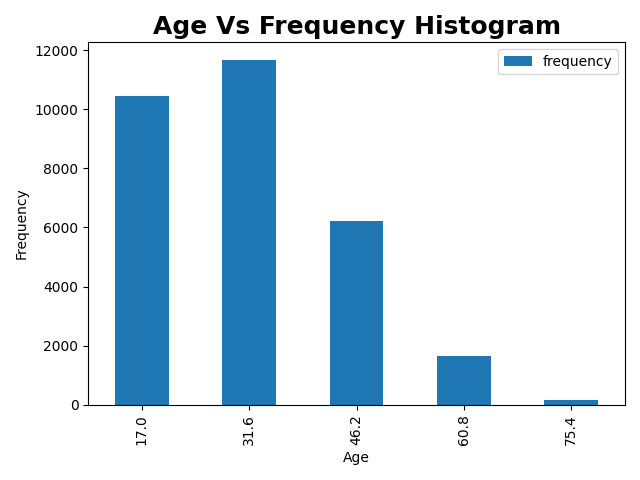

In [13]:
# Drawing histogram for Age vs Frequency 

# Generating bins and count of each bin
age_histogram = df_clean.select('age').rdd.flatMap(lambda x: x).histogram(5)
# Creating pandas dataframe and plotting the histogram
pd.DataFrame(
    list(zip(*age_histogram)), 
    columns=['bin', 'frequency']).set_index('bin').plot(kind='bar');
# Setting the title 
plt.title('Age Vs Frequency Histogram', fontsize=18, fontweight='bold')
# Setting xlabel
plt.xlabel('Age')
# Setting ylabel
plt.ylabel('Frequency')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing histogram by using spark magic
%matplot plt

### Analysis of Age vs Frequency Histogram

In the graph, the average age of the participants are around 32 years old and it gradually reduce as the age increases. Suprisingly enough there are a large number of participants from age 17 to 20. The oldest participents are around 75 years old. However, the maximun age of participants is 90 from discriptive statistic and we assumed that age greater than 76 could be outliers. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

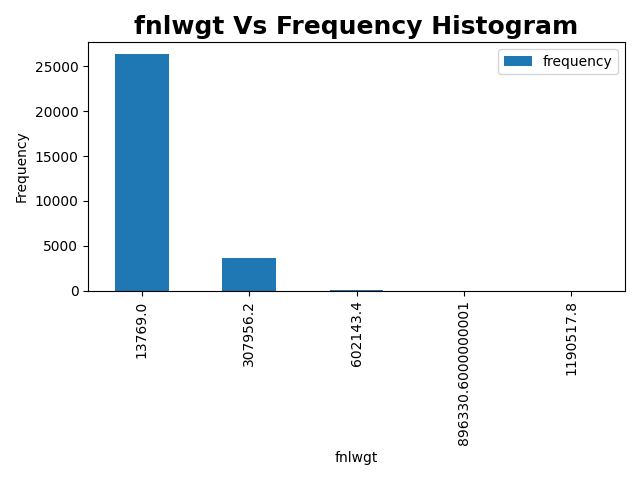

In [14]:
# Drawing histogram for fnlwgt Vs frequency

# Generating bins and count of each bin
fnlwgt_histogram = df_clean.select('fnlwgt').rdd.flatMap(lambda x: x).histogram(5)
# Creating pandas dataframe and plotting the histogram
pd.DataFrame(
    list(zip(*fnlwgt_histogram)), 
    columns=['bin', 'frequency']).set_index('bin').plot(kind='bar');
# Setting the title 
plt.title('fnlwgt Vs Frequency Histogram', fontsize=18, fontweight='bold')
# Setting xlabel
plt.xlabel('fnlwgt')
# Setting ylabel
plt.ylabel('Frequency')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing histogram by using spark magic
%matplot plt

### Analysis of fnlwgt VS Frequency Histogram

The highest sampling wieght is at 13769 and it drops drastically after. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

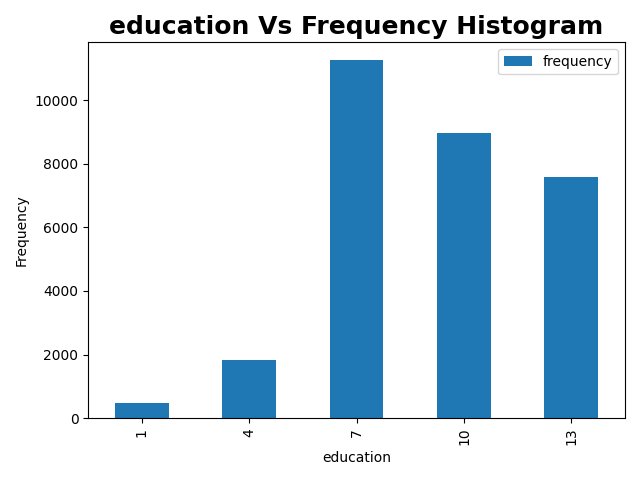

In [15]:
# Drawing histogram for education vs frequency 

# Generating bins and count of each bin
education_histogram = df_clean.select('education_num').rdd.flatMap(lambda x: x).histogram(5)
# Creating pandas dataframe and plotting the histogram
pd.DataFrame(
    list(zip(*education_histogram)), 
    columns=['bin', 'frequency']).set_index('bin').plot(kind='bar');
# Setting the title
plt.title('education Vs Frequency Histogram', fontsize=18, fontweight='bold')
# Setting xlabel
plt.xlabel('education')
# Setting ylabel
plt.ylabel('Frequency')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing histogram by using spark magic
%matplot plt

### Analysis of Education Vs Frequency Histogram

From this graph, most participants spent around 7 years in education. There are still many who spent more than 7 years but very few participants spent less than 4 years of eudcation. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

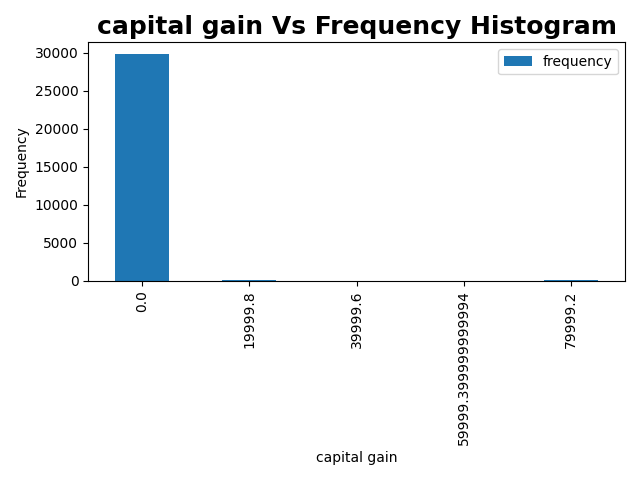

In [16]:
# Drawing histogram for capita_gain vs frequency

# Generating bins and count of each bin
capital_gain_histogram = df_clean.select('capital_gain').rdd.flatMap(lambda x: x).histogram(5)
# Creating pandas dataframe and plotting the histogram
pd.DataFrame(
    list(zip(*capital_gain_histogram)), 
    columns=['bin', 'frequency']).set_index('bin').plot(kind='bar');
# Setting the title
plt.title('capital gain Vs Frequency Histogram', fontsize=18, fontweight='bold')
# Setting xlabel
plt.xlabel('capital gain')
# Setting ylabel
plt.ylabel('Frequency')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing histogram by using spark magic
%matplot plt

### Analysis of Capital gain Vs Frequency Histogram

In this histogram, it appears that most people had a capital gain of 0. There are a few instances where there was some capital gained but they are next to negligible and may be considered outliers.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

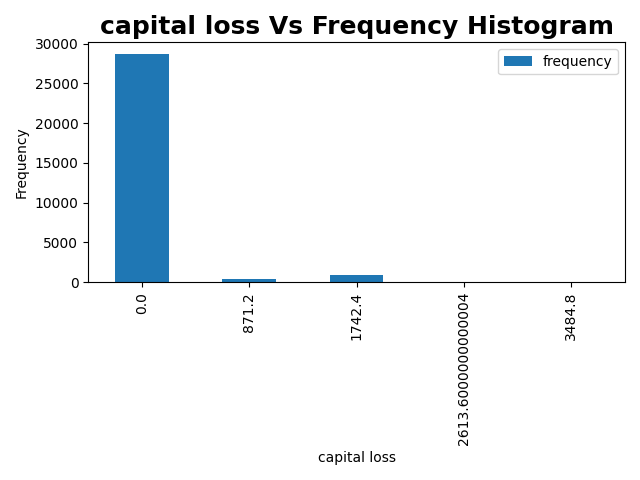

In [17]:
# Drawing histogram for capital_loss vs frequency

# Generating bins and count of each bin
capital_loss_histogram = df_clean.select('capital_loss').rdd.flatMap(lambda x: x).histogram(5)
# Creating pandas dataframe and plotting the histogram
pd.DataFrame(
    list(zip(*capital_loss_histogram)), 
    columns=['bin', 'frequency']).set_index('bin').plot(kind='bar');
# Setting the title
plt.title('capital loss Vs Frequency Histogram', fontsize=18, fontweight='bold')
# Setting xlabel
plt.xlabel('capital loss')
# Setting ylabel
plt.ylabel('Frequency')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing histogram by using spark magic
%matplot plt

### Analysis for Capital loss Vs Frequency Histogram

In this histogram, it appears that most people had a capital loss of 0. There are more instances where some people did have some noticeable losses, but it does not compare to the amount of people who had 0 loss.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

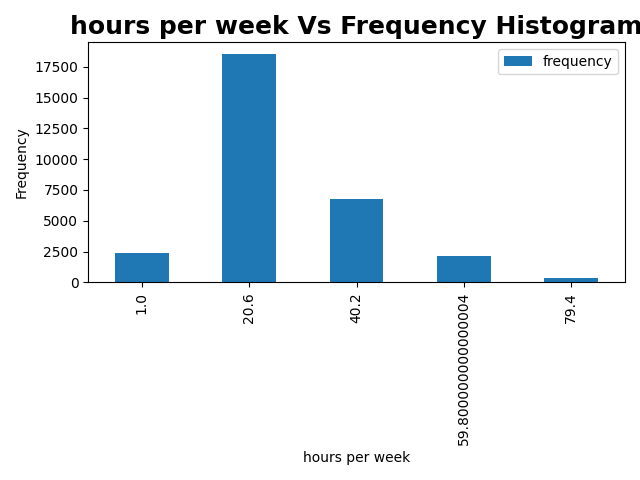

In [18]:
# Drawing histogram for hours_per_week vs frequency

# Generating bins and count of each bin
hours_per_week_histogram = df_clean.select('hours_per_week').rdd.flatMap(lambda x: x).histogram(5)
# Creating pandas dataframe and plotting the histogram
pd.DataFrame(
    list(zip(*hours_per_week_histogram)), 
    columns=['bin', 'frequency']).set_index('bin').plot(kind='bar');
# Setting the title
plt.title('hours per week Vs Frequency Histogram', fontsize=18, fontweight='bold')
# Setting xlabel
plt.xlabel('hours per week')
# Setting ylabel
plt.ylabel('Frequency')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing histogram by using spark magic
%matplot plt

### Analysis for Hours per Week Vs Frequency Histogram

From this graph, majority of participants work around 21 hours per week. Many still works between 30 too 40 hours per week and very few participants work more than 60 hours per week. 

# Bar charts for categorial columns

In [19]:
# Grouping by income column and counting rows
df_clean.groupBy("income").count().orderBy("income").show()

# Grouping by workclass column and counting rows
df_clean.groupBy("workclass").count().orderBy("workclass").show()

# Grouping by education column and counting rows
df_clean.groupBy("education").count().orderBy("education").show() 

# Grouping by marital_status column and counting rows
df_clean.groupBy("marital_status").count().orderBy("marital_status").show()

# Grouping by occupation column and counting rows
df_clean.groupBy("occupation").count().orderBy("occupation").show()

# Grouping by relationship column and counting rows
df_clean.groupBy("relationship").count().orderBy("relationship").show()

# Grouping by race column and counting rows
df_clean.groupBy("race").count().orderBy("race").show()

# Grouping by sex column and counting rows
df_clean.groupBy("sex").count().orderBy("sex").show()

# Grouping by native_country column and counting rows
df_clean.groupBy("native_country").count().orderBy("native_country").show(41)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+-----+
|income|count|
+------+-----+
| <=50K|22633|
|  >50K| 7506|
+------+-----+

+----------------+-----+
|       workclass|count|
+----------------+-----+
|     Federal-gov|  943|
|       Local-gov| 2067|
|         Private|22264|
|    Self-emp-inc| 1074|
|Self-emp-not-inc| 2498|
|       State-gov| 1279|
|     Without-pay|   14|
+----------------+-----+

+------------+-----+
|   education|count|
+------------+-----+
|        10th|  820|
|        11th| 1048|
|        12th|  377|
|     1st-4th|  149|
|     5th-6th|  287|
|     7th-8th|  556|
|         9th|  455|
|  Assoc-acdm| 1008|
|   Assoc-voc| 1307|
|   Bachelors| 5042|
|   Doctorate|  375|
|     HS-grad| 9834|
|     Masters| 1626|
|   Preschool|   44|
| Prof-school|  542|
|Some-college| 6669|
+------------+-----+

+--------------------+-----+
|      marital_status|count|
+--------------------+-----+
|            Divorced| 4212|
|   Married-AF-spouse|   21|
|  Married-civ-spouse|14059|
|Married-spouse-ab...|  370|
|       N

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

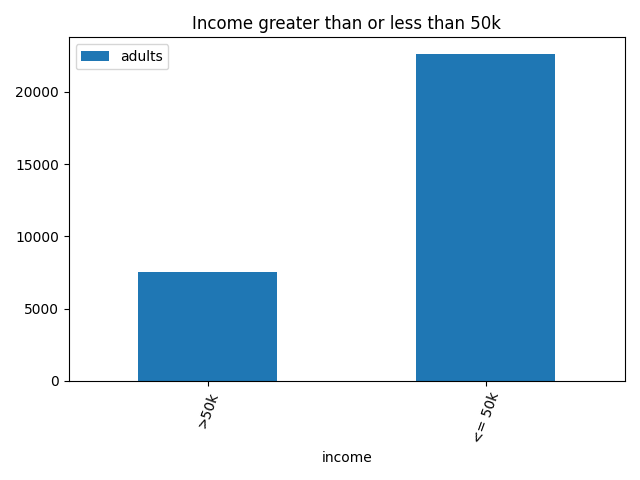

In [20]:
# Drawing barchart for income column
data = {"income":[">50k", "<= 50k"],
        "adults":[7506,22633]
        };
# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="income", y="adults", rot=70, title="Income greater than or less than 50k");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt

### Analysis for Income Greater than or Less than 50K

In this graph, majority of participants makes less than 50K a year. A very few percentage of participants makes more than 50K a year. However, the dataset is collected in 1996, so 50K dollars that time must worth more than today's money. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

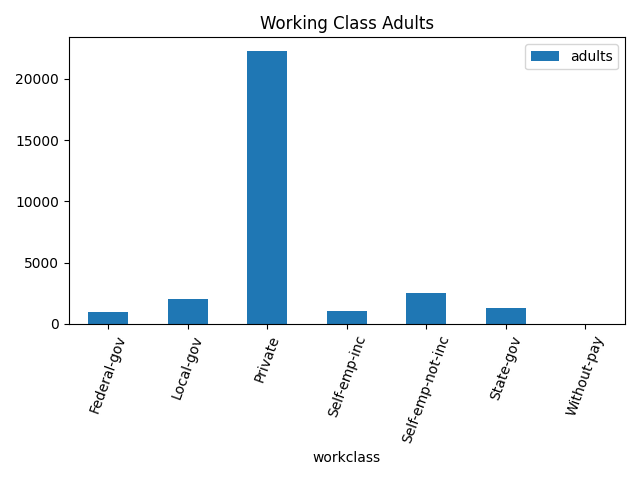

In [21]:
# drawing barchart for workclass column
data = {"workclass":["Federal-gov", "Local-gov","Private","Self-emp-inc","Self-emp-not-inc","State-gov","Without-pay"],
        "adults":[943,2067,22264,1074,2498,1279,14]
        };
# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="workclass", y="adults", rot=70, title="Working Class Adults");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt

### Analysis for Working Class Adults

It is evident that private sector is the most popular form of employment. The other forms of employements are pretty much non existent compare to private secotr. It is possible that during 1996, majiority of popuplation was working in private secotr but comparing to right now, self-employed would be as high as Private sector. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

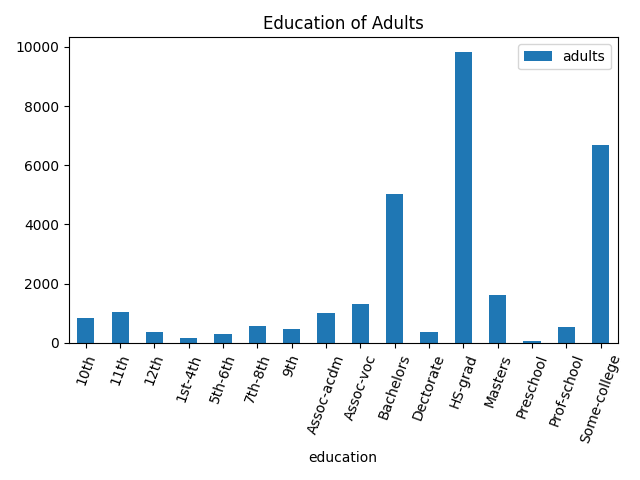

In [22]:
# Drawing barchart for education column
data = {"education":["10th","11th","12th","1st-4th","5th-6th","7th-8th","9th","Assoc-acdm","Assoc-voc","Bachelors",
                     "Dectorate","HS-grad","Masters","Preschool","Prof-school","Some-college"],
        "adults":[820,1048,377,149,287,556,455,1008,1307,5042,375,9834,1626,44,542,6669]
        };
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="education", y="adults", rot=70, title="Education of Adults");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt

### Analysis for Education of Adults

The majority of population is only graduated from high school and very few has Bachelor degree and Masters. A decent numbers of participants attened some college but did not seem graduated. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

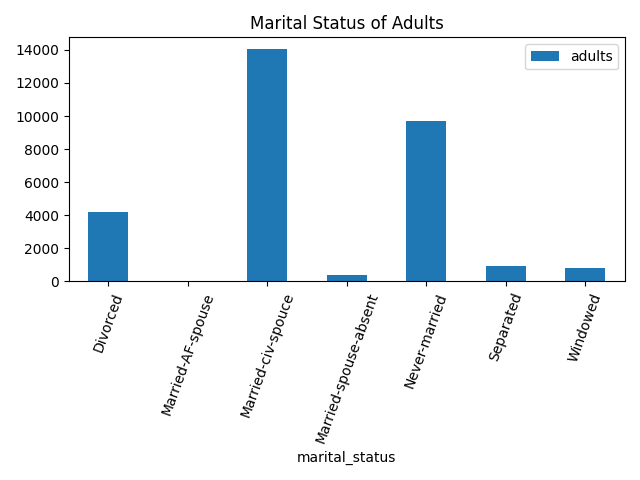

In [23]:
# Drawing barchart for martial status column
data = {"marital_status":["Divorced","Married-AF-spouse","Married-civ-spouce","Married-spouse-absent","Never-married","Separated","Windowed"],
        "adults":[4212,21,14059,370,9711,939,827]
        };
# Dictionary loaded into a DataFrame  
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="marital_status", y="adults", rot=70, title="Marital Status of Adults");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt

### Analysis for Marital Status of Adults

The majority of participants are married and a large amount of population is never-married. It seems to be single and married percentage is pretty much equal. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

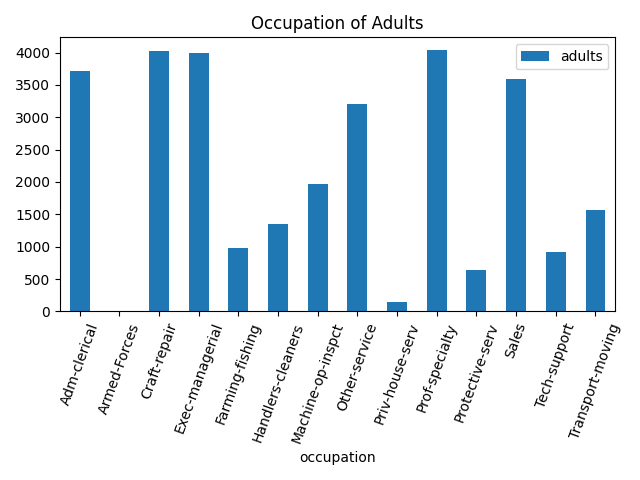

In [24]:
# Drawing barchart for occupation column
data = {"occupation":["Adm-clerical","Armed-Forces","Craft-repair","Exec-managerial","Farming-fishing","Handlers-cleaners","Machine-op-inspct","Other-service",
                      "Priv-house-serv","Prof-specialty","Protective-serv","Sales","Tech-support","Transport-moving"],
        "adults":[3719,9,4025,3991,987,1349,1964,3209,141,4034,644,3584,911,1572]
        };
# Dictionary loaded into a DataFrame   
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="occupation", y="adults", rot=70, title="Occupation of Adults");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt

### Analysis for Occupation of Adults

As expected, many of the participants work as professionals eventhough there were many participants who only graduated from high school. Suprisingly, there are no participants that are working for the military. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

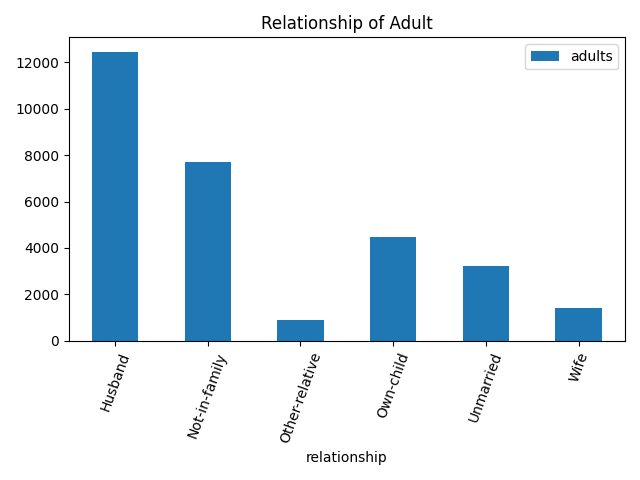

In [25]:
# Drawing barchart for relationship column
data = {"relationship":["Husband", "Not-in-family","Other-relative","Own-child","Unmarried","Wife"],
        "adults":[12457,7714,889,4462,3211,1406]
        };
# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="relationship", y="adults", rot=70, title="Relationship of Adult");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt

### Analysis of  Relationship of Adult

As we saw that majority of the participants are male, it is not very suprising to see husband category is the highest. However, it is interesting that wife category is very low compare to husband. There might be a possiblity that married couples have different last names which is why not-in-family cateogry is the second highest. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

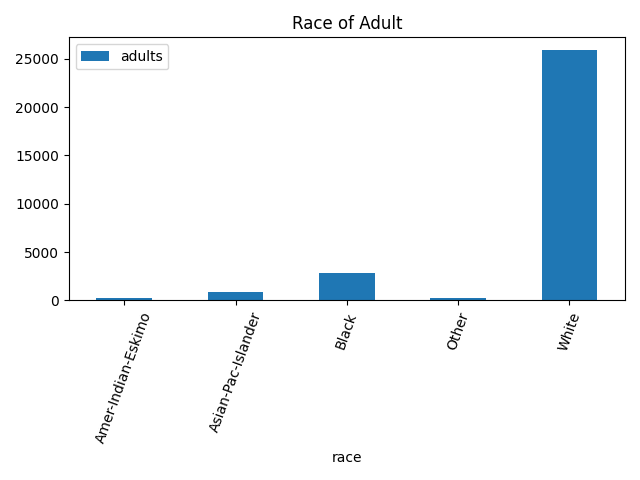

In [26]:
# Drawing barchart for race column
data = {"race":["Amer-Indian-Eskimo","Asian-Pac-Islander","Black","Other","White"],
        "adults":[286,894,2816,231,25912]
        };
# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="race", y="adults", rot=70, title="Race of Adult");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt

### Analysis of Race of Adults

Since, the data is collected in the United States, it is evident that the majority of the population is white followed by black population. However, it is not very realistic that other race such as Asian and others are relatively low compare to the real population of the United States. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

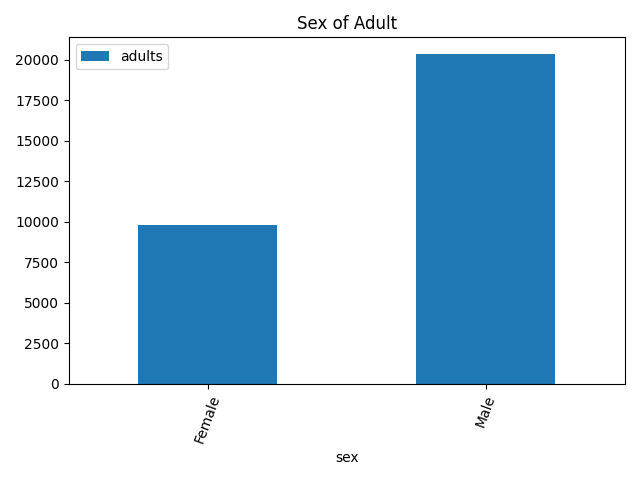

In [27]:
# Drawing barchart for sex column
data = {"sex":["Female","Male"],
        "adults":[9773,20366]
        };
# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="sex", y="adults", rot=70, title="Sex of Adult");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt

# Analysis for Sex of Adults

There is a larger portion of males in this data set. So much so that males make up 2/3 of this data set's population.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

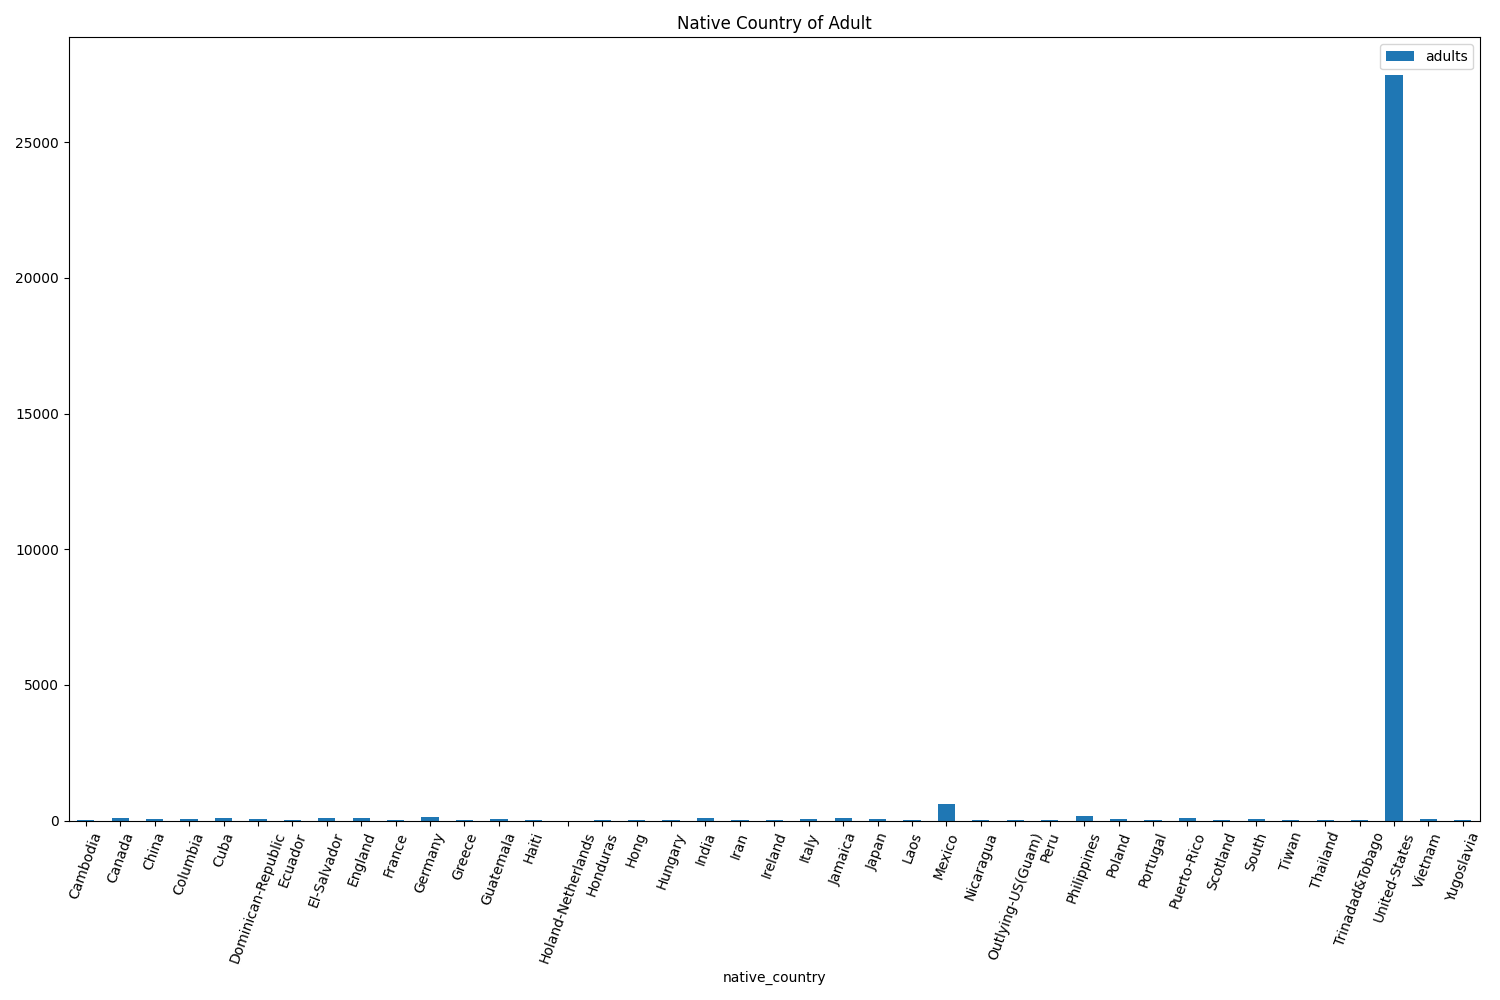

In [28]:
# Drawing barchart for native country column
data = {"native_country":["Cambodia","Canada","China","Columbia","Cuba","Dominican-Republic","Ecuador",
                          "El-Salvador","England","France","Germany","Greece","Guatemala","Haiti",
                          "Holand-Netherlands","Honduras","Hong","Hungary","India","Iran","Ireland",
                          "Italy","Jamaica","Japan","Laos","Mexico","Nicaragua","Outlying-US(Guam)",
                          "Peru","Philippines","Poland","Portugal","Puerto-Rico","Scotland","South",
                          "Tiwan","Thailand","Trinadad&Tobago","United-States","Vietnam","Yugoslavia"],
        "adults":[18,107,68,56,92,67,27,100,86,27,128,29,61,42,1,12,19,13,100,42,24,68,80,59,17,606,33,14,30,
                  188,56,34,109,11,71,42,17,18,27487,64,16]
        };
# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="native_country", y="adults", rot=70, title="Native Country of Adult", figsize=(15, 10));

plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt

# Analysis for Native Country of Adults

It apears there there is a very wide array of native countrys that these adults belong to, but the largest native country count is the US. This
is most likely due to the data coming from the US itself.

# Scatter plots

In [29]:
# Converting the spark dataframe to pandas dataframe
pandasdf = df_clean.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

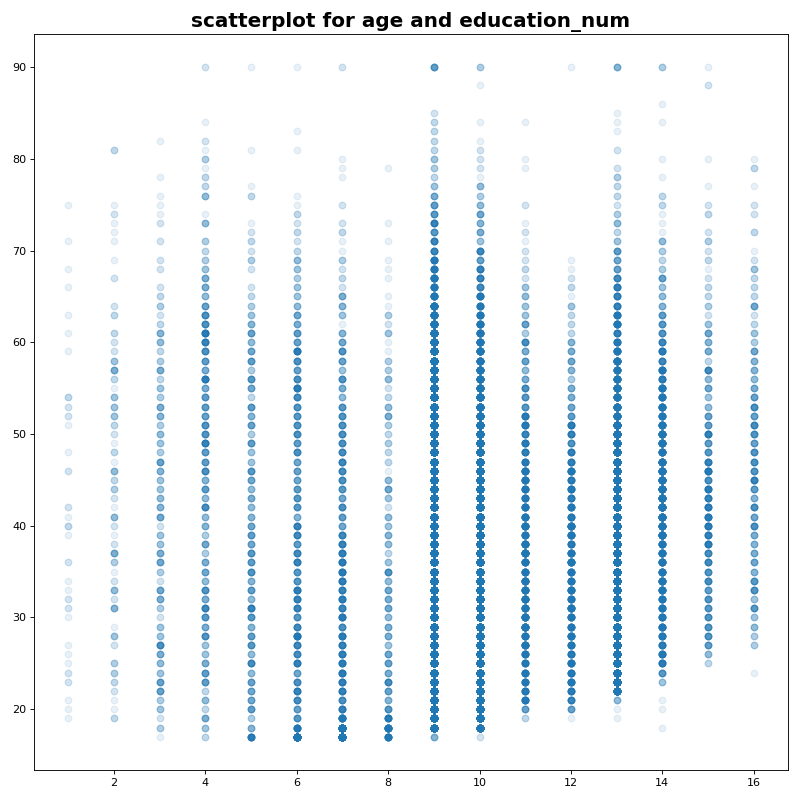

In [30]:
# Drawing scatterplot for age and education_num column

# Setting the figure size and dpi pixels
figure(figsize=(10,10), dpi=80)
# Assigning age column to variable a
a = pandasdf["age"]
# Assigning education_num column to variable b
b = pandasdf["education_num"]
# Plotting scatter plot with transparency
plt.scatter (b,a, alpha = 0.1)
# Setting title
plt.title('scatterplot for age and education_num', fontsize=18, fontweight='bold')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing scatter plot using Spark magic
%matplot plt

### Analysis for Age and Education_num Scatter Plot 

There is a strong cluster in 9th and 13 th ( 1 year of college). The graph is skewed towards more education and fall off with those who are less educated. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

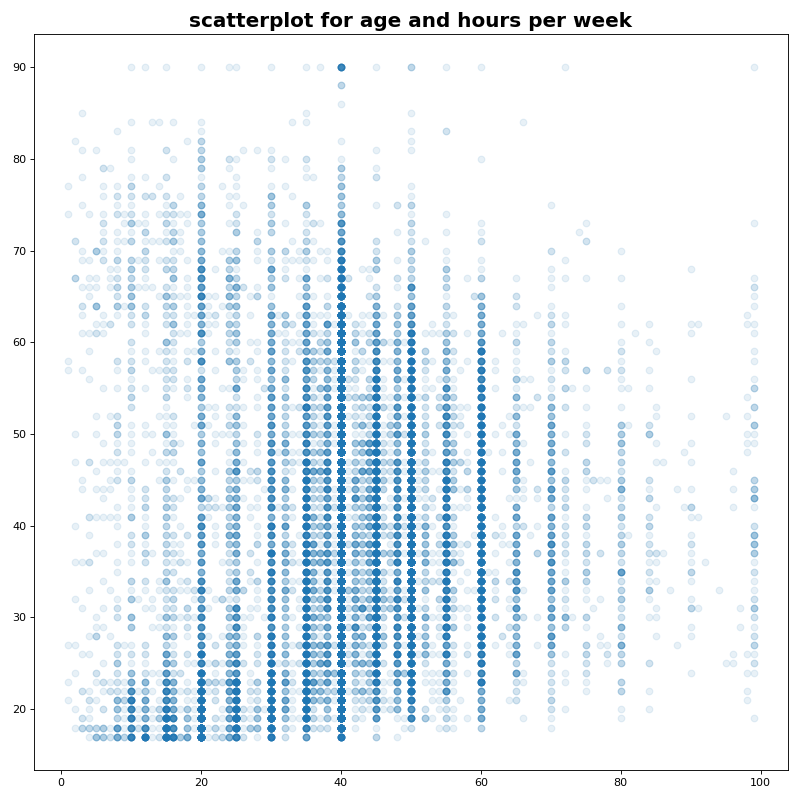

In [31]:
# Drawing scatterplot for age and hours per week column 

# Setting the figure size and dpi pixels
figure(figsize=(10,10), dpi=80)
# Assigning age column to variable a
a = pandasdf["age"]
# Assigning hours_per_week column to variable b
b = pandasdf["hours_per_week"]
# Plotting scatter plot with transparency
plt.scatter (b,a, alpha = 0.1)
# Setting title
plt.title('scatterplot for age and hours per week', fontsize=18, fontweight='bold')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing scatter plot using spark magic
%matplot plt

### Analysis for Age and Hours per Week Scatter Plot

There is a strong cluster around 40 hours a week, 50, and 60. With 40 years, it seems all ages have a strong correlation here. With 50 and 60 hours, the cut off
age seems to be 60.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

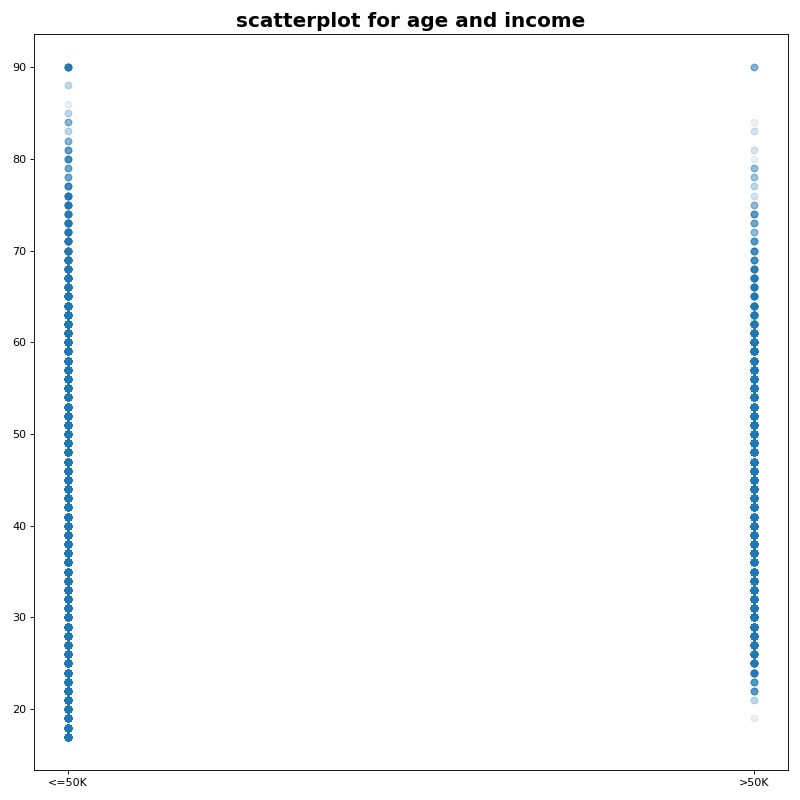

In [32]:
# scatterplot for age and income columns

# Setting the figure size and dpi pixels
figure(figsize=(10,10), dpi=80)
# Assigning age column to variable a
a = pandasdf["age"]
# Assigning income column to varaible b
b = pandasdf["income"]
# Plotting scatter plot with transparency
plt.scatter (b,a, alpha = 0.1)
# Setting title
plt.title('scatterplot for age and income', fontsize=18, fontweight='bold')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing scatter plot using spark magic
%matplot plt

### Analysis for Age and Income Scatter Plot


It is visible that regardless of age, many people make less than 50K a year and it almost seems quite uniform in its distribution. Middle age adults have a stronger chance to earn more than 50K a year. 

# Outliers Analysis

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

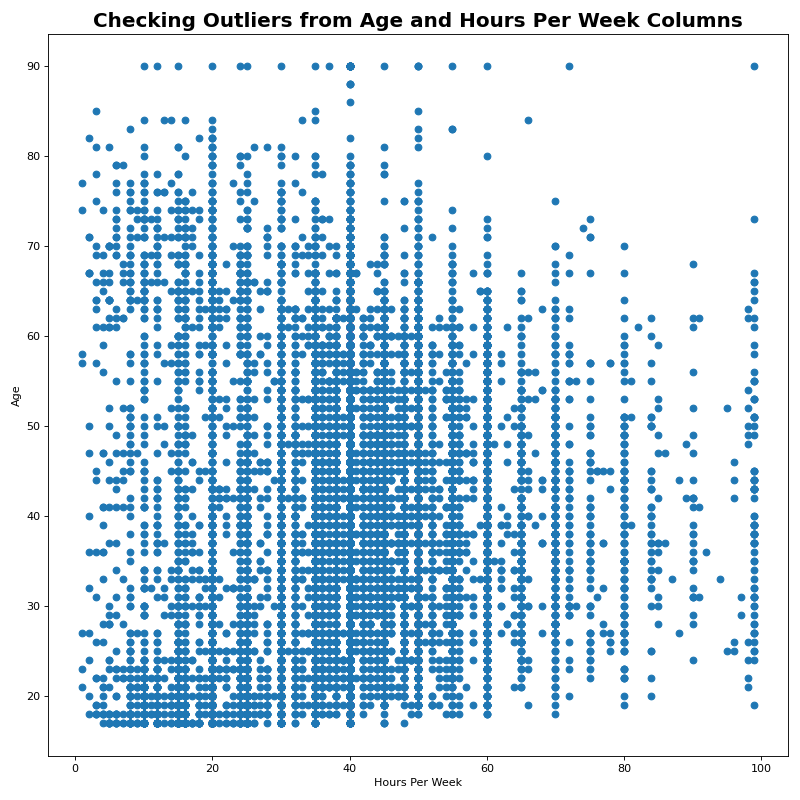

In [33]:
# scatterplot for age and hours per week columns

# Setting the figure size and dpi pixels
figure(figsize=(10,10), dpi=80)
# Assigning age column to variable a
a = pandasdf["age"]
# Assigning income column to varaible b
b = pandasdf["hours_per_week"]
# Plotting scatter plot with transparency
plt.scatter (b,a)
# Setting title
plt.title('Checking Outliers from Age and Hours Per Week Columns', fontsize=18, fontweight='bold')
# Setting x label
plt.xlabel ("Hours Per Week")
# Setting y label
plt.ylabel ("Age")
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing scatter plot using spark magic
%matplot plt

# Checking for Outliers from Scatter Plots

From the above scatter plot, we can see that most data are more dense on the left side of the graph. Approximately age greater than 78 are outliers and similarly, hours per week greater than 77 are outliers. We will double check our conclusion by drawing boxplots for age and hours_per_week columns

## Box Pot for Hour per Week Column

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

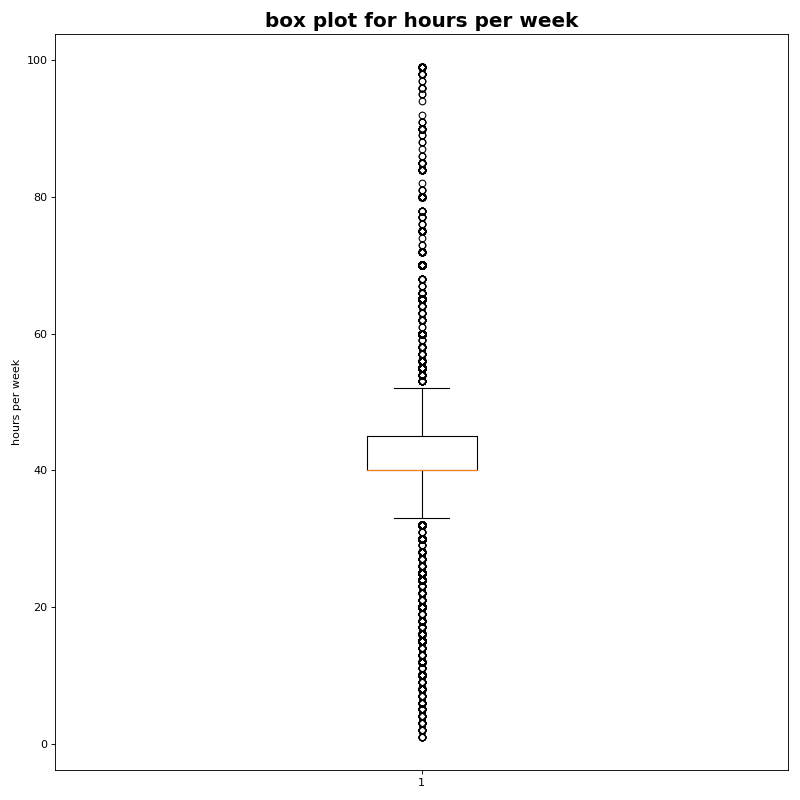

In [34]:
# box plot for hours per week columns

# Setting the figure size and dpi pixels
figure(figsize=(10,10), dpi=80)
# Assigning age column to variable a
a = pandasdf["hours_per_week"]
# Plotting scatter plot with transparency
plt.boxplot (a)
# Setting title
plt.title('box plot for hours per week', fontsize=18, fontweight='bold')
# Setting y label
plt.ylabel ('hours per week')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing scatter plot using spark magic
%matplot plt

# Hours per Week Column Outliers Analysis

From this boxplot, we decided that 80 hours and above are outliers. Eventhough the box plot indicates possible outliers below 40 hours but the scatter plots shows that there is a relation between age and hours less than 40. So, we concluded to filter out 80 hours and above as outliers. 

In [35]:
#remove outliars from Hours per week
df_clean2 = df_clean.filter(
     ((df_clean.hours_per_week != '81')
    & (df_clean.hours_per_week != '82')
    & (df_clean.hours_per_week != '83')
    & (df_clean.hours_per_week != '84')
    & (df_clean.hours_per_week != '85')
    & (df_clean.hours_per_week != '86')
    & (df_clean.hours_per_week != '87')
    & (df_clean.hours_per_week != '88')
    & (df_clean.hours_per_week != '89')
    & (df_clean.hours_per_week != '90')
    & (df_clean.hours_per_week != '91')
    & (df_clean.hours_per_week != '92')
    & (df_clean.hours_per_week != '93')
    & (df_clean.hours_per_week != '94')
    & (df_clean.hours_per_week != '95')
    & (df_clean.hours_per_week != '96')
    & (df_clean.hours_per_week != '97')
    & (df_clean.hours_per_week != '98')
    & (df_clean.hours_per_week != '99')
   ))

# Showing the first 5 rows of the data
df_clean2.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+----------------+------+------------+-------------+------------------+---------------+-------------+-----+------+------------+------------+--------------+--------------+------+
|age|       workclass|fnlwgt|   education|education_num|    marital_status|     occupation| relationship| race|   sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+---+----------------+------+------------+-------------+------------------+---------------+-------------+-----+------+------------+------------+--------------+--------------+------+
| 36|         Private|224566|  Assoc-acdm|           12|     Never-married| Prof-specialty|Not-in-family|White|  Male|           0|        1669|            45| United-States| <=50K|
| 66|       Local-gov|174486|   Doctorate|           16|Married-civ-spouse| Prof-specialty|      Husband|Black|  Male|       20051|           0|            35|       Jamaica|  >50K|
| 33|         Private|356823|   Bachelors|           13|     Never-married| Prof-specialty

In [36]:
# counting the data before and after removing outliers from hours_per_week column
df_clean.count(),df_clean2.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(30139, 29944)

Loss of 195 records = loss of 0.65%

## Box Plot for Age Column 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

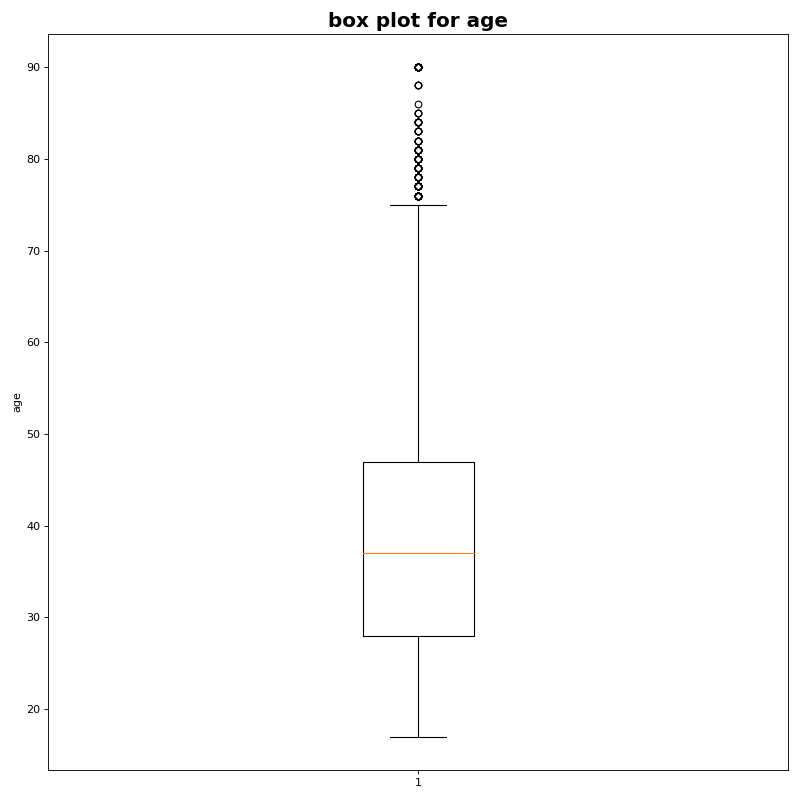

In [37]:
# box plot for age column

# Setting the figure size and dpi pixels
figure(figsize=(10,10), dpi=80)
# Assigning age column to variable a
a = pandasdf["age"]
# Plotting scatter plot with transparency
plt.boxplot (a)
# Setting title
plt.title('box plot for age', fontsize=18, fontweight='bold')
# Setting y label
plt.ylabel ('age')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing scatter plot using spark magic
%matplot plt

# Age Column Outliers Analysis

From this boxplot, we can clearly see that age approximately 78 and above are outliers. So we decided to filter out those outliers. 

In [38]:
# remove all outliars in age
df_clean3 = df_clean2.filter(
    ((df_clean2.age != '78')
    & (df_clean2.age != '79')
    & (df_clean2.age != '80')
    & (df_clean2.age != '81')
    & (df_clean2.age != '82')
    & (df_clean2.age != '83')
    & (df_clean2.age != '84')
    & (df_clean2.age != '85')
    & (df_clean2.age != '86')
    & (df_clean2.age != '87')
    & (df_clean2.age != '88')
    & (df_clean2.age != '89')
    & (df_clean2.age != '90')

    ))

# Showing the first 5 rows of the data
df_clean3.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+----------------+------+------------+-------------+------------------+---------------+-------------+-----+------+------------+------------+--------------+--------------+------+
|age|       workclass|fnlwgt|   education|education_num|    marital_status|     occupation| relationship| race|   sex|capital_gain|capital_loss|hours_per_week|native_country|income|
+---+----------------+------+------------+-------------+------------------+---------------+-------------+-----+------+------------+------------+--------------+--------------+------+
| 36|         Private|224566|  Assoc-acdm|           12|     Never-married| Prof-specialty|Not-in-family|White|  Male|           0|        1669|            45| United-States| <=50K|
| 66|       Local-gov|174486|   Doctorate|           16|Married-civ-spouse| Prof-specialty|      Husband|Black|  Male|       20051|           0|            35|       Jamaica|  >50K|
| 33|         Private|356823|   Bachelors|           13|     Never-married| Prof-specialty

In [39]:
# counting the data before and after removing outliers from age column
df_clean.count(),df_clean3.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(30139, 29826)

Loss of 447 records = loss of 1.48%

# Discriptive statistic after removing outliers

In [40]:
# temporarily dropping categorial Columns for discriptive statistic
temp_df2 = df_clean3. drop("workclass","education","marital_status","occupation","relationship", "race", "sex", "native_country","income")
# Showing the first row of the data
temp_df.show(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+------+-------------+------------+------------+--------------+
|age|fnlwgt|education_num|capital_gain|capital_loss|hours_per_week|
+---+------+-------------+------------+------------+--------------+
| 36|224566|           12|           0|        1669|            45|
+---+------+-------------+------------+------------+--------------+
only showing top 1 row

Bfore we run the discriptive statistic of the dataset. We wanted to temporarily dropped the categorial columns of that data to have a better reading of the statistics. We showed the first row of our temporary dataset to make sure that there are no more categorical columns avaliable.


# Descripitive statistic 


# Data visualization after removing outliers

In [41]:
temp_df2.describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+
|summary|               age|           fnlwgt|     education_num|     capital_gain|     capital_loss|   hours_per_week|
+-------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+
|  count|             29826|            29826|             29826|            29826|            29826|            29826|
|   mean|  38.2430429826326|190056.2947763696|10.125159257024073|1091.236002145779|87.93891235834506|40.63903976396433|
| stddev|12.850373925393274|105702.3760789772| 2.541654855531083|7418.142253335527|402.5524195902507|11.21994676613926|
|    min|                17|            13769|                 1|                0|                0|                1|
|    max|                77|          1484705|                16|            99999|             3900|               80|
+-------+------------------+------------

The observations of the discriptive statistic after removing outliers are as follows:

The min and max age is now 17 to 77 but the average age is still 38. 

The min and max years spent on education is still the same, 1 and 16 respectively and the mean education years spent is 10.

The number of work hours per week changed from 1 to 80 hours and the mean work hours remain at 40. 

# Histograms for numerical columns after removing outliers

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

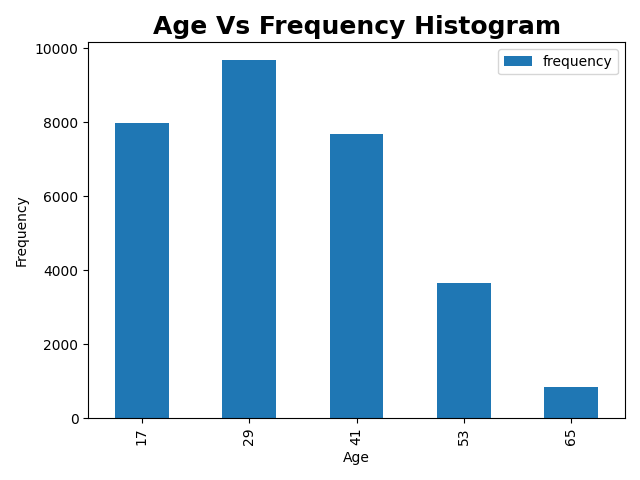

In [42]:
# Drawing histogram for Age vs Frequency 
# Generating bins and count of each bin
age_histogram = df_clean3.select('age').rdd.flatMap(lambda x: x).histogram(5)
# Creating pandas dataframe and plotting the histogram
pd.DataFrame(
 list(zip(*age_histogram)), 
 columns=['bin', 'frequency']).set_index('bin').plot(kind='bar');
# Setting the title 
plt.title('Age Vs Frequency Histogram', fontsize=18, fontweight='bold')
# Setting xlabel
plt.xlabel('Age')
# Setting ylabel
plt.ylabel('Frequency')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing histogram by using spark magic
%matplot plt

### Age vs Frequency Histogram

After removing the outliers, the average age of participants have changed to 29 and its frequency decreases as the age increases. Surprisingly, there are still a large number of participants around 17 to 20 years of age. The highest age in this histogram is now at 65 and it is possible that there are not too many people over 65 that are continue working. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

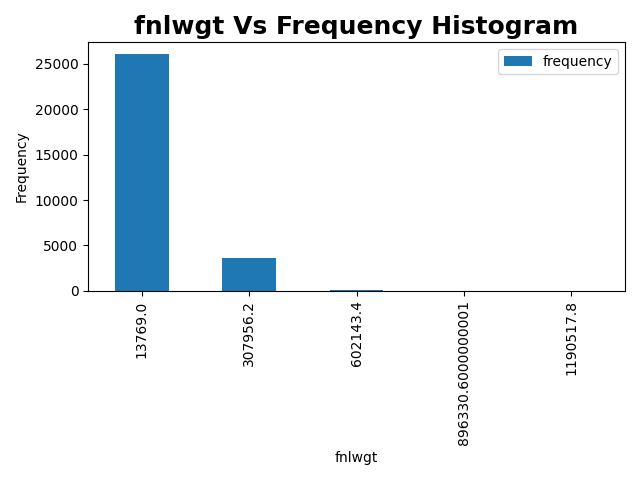

In [43]:
# Drawing histogram for fnlwgt Vs frequency
# Generating bins and count of each bin
fnlwgt_histogram = df_clean3.select('fnlwgt').rdd.flatMap(lambda x: x).histogram(5)
# Creating pandas dataframe and plotting the histogram
pd.DataFrame(
 list(zip(*fnlwgt_histogram)), 
 columns=['bin', 'frequency']).set_index('bin').plot(kind='bar');
# Setting the title 
plt.title('fnlwgt Vs Frequency Histogram', fontsize=18, fontweight='bold')
# Setting xlabel
plt.xlabel('fnlwgt')
# Setting ylabel
plt.ylabel('Frequency')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing histogram by using spark magic
%matplot plt


### Analysis for Fnlwgt VS Frequency Histogram

After removing the outliers, there Fnlwgt hasn't changed at all. The highest sampling weight is still at 13769. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

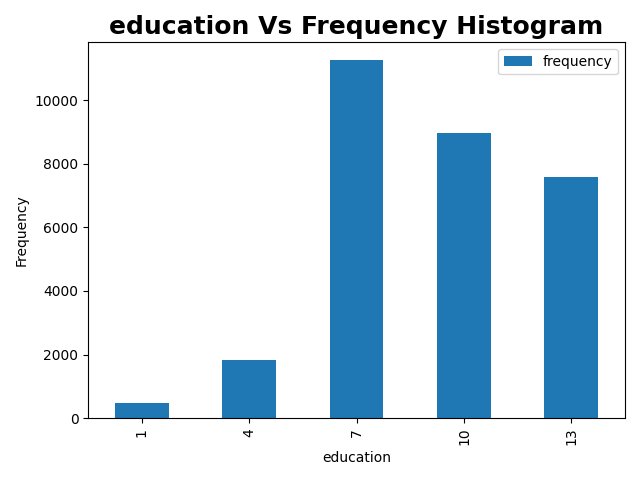

In [44]:
# Drawing histogram for education vs frequency 
# Generating bins and count of each bin
education_histogram = df_clean.select('education_num').rdd.flatMap(lambda x: x).histogram(5)
# Creating pandas dataframe and plotting the histogram
pd.DataFrame(
 list(zip(*education_histogram)), 
 columns=['bin', 'frequency']).set_index('bin').plot(kind='bar');
# Setting the title
plt.title('education Vs Frequency Histogram', fontsize=18, fontweight='bold')
# Setting xlabel
plt.xlabel('education')
# Setting ylabel
plt.ylabel('Frequency')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing histogram by using spark magic
%matplot plt


### Analysis of Education vs Frequency Histogram

After removing the outliers, it is pretty much the same. Most participants spent around 7 years in education. There are still many who spent more than 7 years but very few participants spent less than 4 years of eudcation.


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

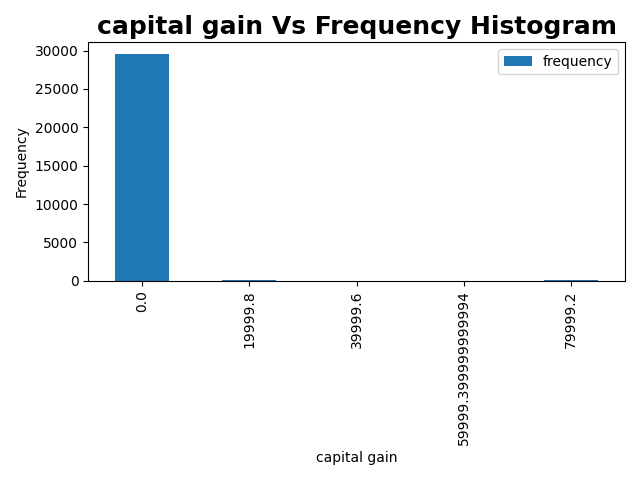

In [45]:
# Drawing histogram for capita_gain vs frequency
# Generating bins and count of each bin
capital_gain_histogram = df_clean3.select('capital_gain').rdd.flatMap(lambda x: x).histogram(5)
# Creating pandas dataframe and plotting the histogram
pd.DataFrame(
 list(zip(*capital_gain_histogram)), 
 columns=['bin', 'frequency']).set_index('bin').plot(kind='bar');
# Setting the title
plt.title('capital gain Vs Frequency Histogram', fontsize=18, fontweight='bold')
# Setting xlabel
plt.xlabel('capital gain')
# Setting ylabel
plt.ylabel('Frequency')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing histogram by using spark magic
%matplot plt


### Analysis of Capital gain Vs Frequency Histogram

The graph seems quite unchanged after removing the outliers. As before, there was very little change and most people still had 0 capital gain.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

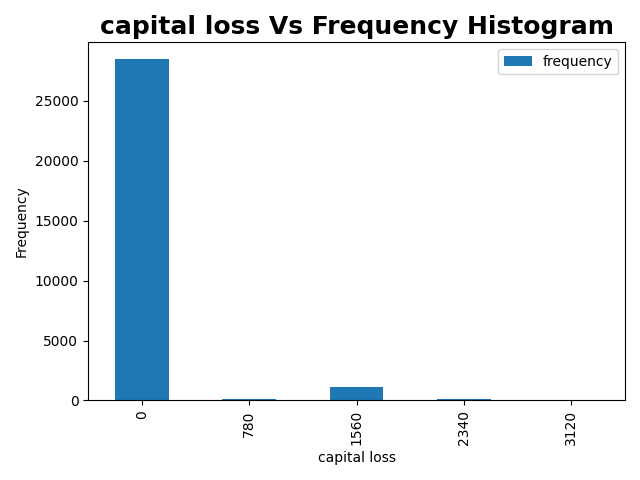

In [46]:
# Drawing histogram for capital_loss vs frequency
# Generating bins and count of each bin
capital_loss_histogram = df_clean3.select('capital_loss').rdd.flatMap(lambda x: x).histogram(5)
# Creating pandas dataframe and plotting the histogram
pd.DataFrame(
 list(zip(*capital_loss_histogram)), 
 columns=['bin', 'frequency']).set_index('bin').plot(kind='bar');
# Setting the title
plt.title('capital loss Vs Frequency Histogram', fontsize=18, fontweight='bold')
# Setting xlabel
plt.xlabel('capital loss')
# Setting ylabel
plt.ylabel('Frequency')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing histogram by using spark magic
%matplot plt


### Analysis for Capital loss Vs Frequency Histogram

After removing outliers, it seems that there was a bit of growth in the people who lost about 1560 of capital. Despite the small growth, the amount of people who lost 0 capital still overshadows other any other instances.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

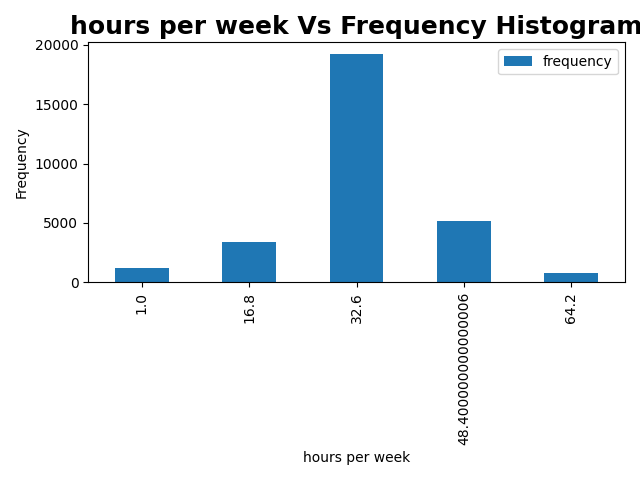

In [47]:
# Drawing histogram for hours_per_week vs frequency
# Generating bins and count of each bin
hours_per_week_histogram = df_clean3.select('hours_per_week').rdd.flatMap(lambda x: x).histogram(5)
# Creating pandas dataframe and plotting the histogram
pd.DataFrame(
 list(zip(*hours_per_week_histogram)), 
 columns=['bin', 'frequency']).set_index('bin').plot(kind='bar');
# Setting the title
plt.title('hours per week Vs Frequency Histogram', fontsize=18, fontweight='bold')
# Setting xlabel
plt.xlabel('hours per week')
# Setting ylabel
plt.ylabel('Frequency')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing histogram by using spark magic
%matplot plt


### Analysis for Hours per Week Vs Frequency Histogram

After removing the outliers, majority of paticipants work hours changed to 33 hours a week and there's a large amount of ppl who works 48 hours a week. 

# Bar charts for categorial columns after removing outliers

In [48]:
# Grouping by income column and counting rows
df_clean3.groupBy("income").count().orderBy("income").show()

# Grouping by workclass column and counting rows
df_clean3.groupBy("workclass").count().orderBy("workclass").show()

# Grouping by education column and counting rows
df_clean3.groupBy("education").count().orderBy("education").show() 

# Grouping by marital_status column and counting rows
df_clean3.groupBy("marital_status").count().orderBy("marital_status").show()

# Grouping by occupation column and counting rows
df_clean3.groupBy("occupation").count().orderBy("occupation").show()

# Grouping by relationship column and counting rows
df_clean3.groupBy("relationship").count().orderBy("relationship").show()

# Grouping by race column and counting rows
df_clean3.groupBy("race").count().orderBy("race").show()

# Grouping by sex column and counting rows
df_clean3.groupBy("sex").count().orderBy("sex").show()

# Grouping by native_country column and counting rows
df_clean3.groupBy("native_country").count().orderBy("native_country").show(41)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+-----+
|income|count|
+------+-----+
| <=50K|22406|
|  >50K| 7420|
+------+-----+

+----------------+-----+
|       workclass|count|
+----------------+-----+
|     Federal-gov|  940|
|       Local-gov| 2048|
|         Private|22098|
|    Self-emp-inc| 1043|
|Self-emp-not-inc| 2409|
|       State-gov| 1274|
|     Without-pay|   14|
+----------------+-----+

+------------+-----+
|   education|count|
+------------+-----+
|        10th|  811|
|        11th| 1039|
|        12th|  372|
|     1st-4th|  144|
|     5th-6th|  285|
|     7th-8th|  534|
|         9th|  451|
|  Assoc-acdm| 1002|
|   Assoc-voc| 1294|
|   Bachelors| 5006|
|   Doctorate|  363|
|     HS-grad| 9726|
|     Masters| 1608|
|   Preschool|   44|
| Prof-school|  528|
|Some-college| 6619|
+------------+-----+

+--------------------+-----+
|      marital_status|count|
+--------------------+-----+
|            Divorced| 4186|
|   Married-AF-spouse|   20|
|  Married-civ-spouse|13869|
|Married-spouse-ab...|  365|
|       N

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

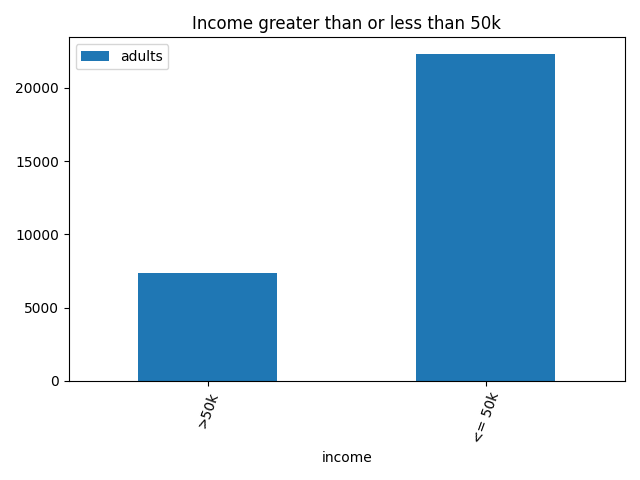

In [49]:
# Drawiing barchart for income column
data = {"income":[">50k", "<= 50k"],
 "adults":[7366,22326]
 };
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="income", y="adults", rot=70, title="Income greater than or less than 50k");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt

### Analysis of Income Greater than or Less than 50K

After removing the outliers, it is still clear to see that adults tend to make less than 50k a year. In a rough estimate, only about 25% of the total adult
population makes more than 50K a year.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

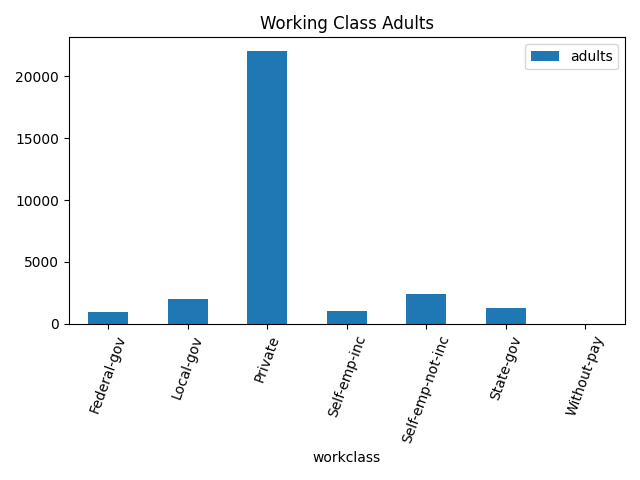

In [50]:
# drawing barchart for workclass column
data = {"workclass":["Federal-gov", "Local-gov","Private","Self-emp-inc","Self-emp-not-inc","State-gov","Without-pay"],
 "adults":[936,2040,22035,1021,2377,1269,14]
 };
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="workclass", y="adults", rot=70, title="Working Class Adults");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt


### Analysis of Working Class Adults

After removing the outliers, the most popular form of employment is the private sector. Government jobs and self-employed jobs are scarce and those
without pay are almost nonexistent.


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

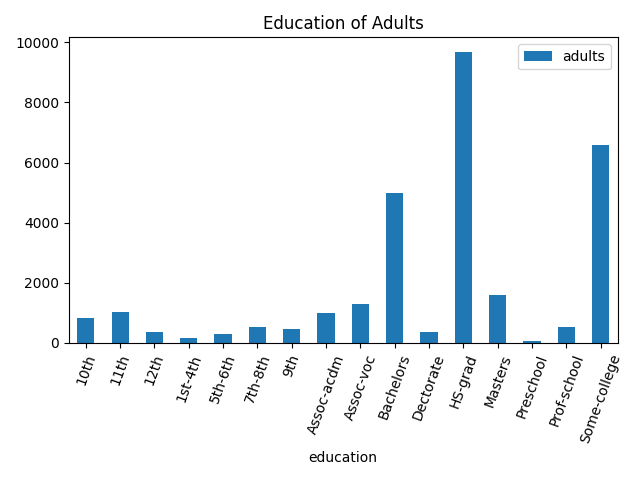

In [51]:
# Drawing barchart for education column
data = {"education":["10th","11th","12th","1st-4th","5th-6th","7th-8th","9th","Assoc-acdm","Assoc-voc","Bachelors",
 "Dectorate","HS-grad","Masters","Preschool","Prof-school","Some-college"],
 "adults":[807,1039,372,142,285,531,451,996,1292,4987,357,9683,1596,44,517,6593]
 };
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="education", y="adults", rot=70, title="Education of Adults");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt

### Analysis of Education of Adults

After remoivng the outliers, it is still apparent that most adults complete at least high school. The lower the education level, the lower the number of adults fall
into that category. A good example would be preschool, almost no adult has only completed preschool, and the vast majority has at least
completed high school. There seems to be that less than half of those who attended college received a bachelor’s degree. And even less so
a masters or doctorate.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

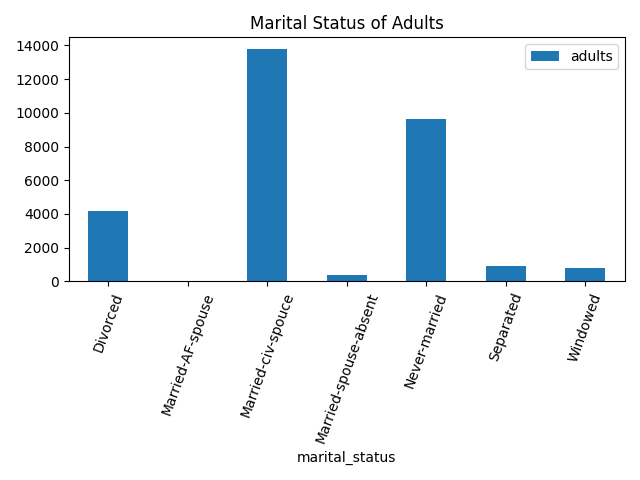

In [52]:
# Drawing barchart for martial status column
data = {"marital_status":["Divorced","Married-AF-spouse","Married-civ-spouce","Married-spouse-absent","Never-married","Separated","Windowed"],
 "adults":[4166,19,13793,362,9630,932,790]
 };
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="marital_status", y="adults", rot=70, title="Marital Status of Adults");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt

### Analysis of Marital Status of Adults

After removing the outliers, the bar graph reveals that about half the population is single. Although the largest bar on this graph is for married with a spouse, the
second and third are never married and divorced. These categories are followed by separated and widowed and absent spouses. It appears
that marital status is almost a perfect 50/50.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

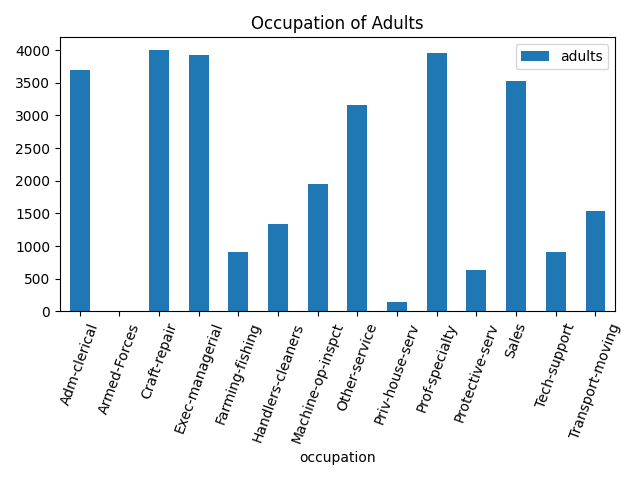

In [53]:
# Drawing barchart for occupation column
data = {"occupation":["Adm-clerical","Armed-Forces","Craft-repair","Exec-managerial","Farming-fishing","Handlers-cleaners","Machine-op-inspct","Other-service",
 "Priv-house-serv","Prof-specialty","Protective-serv","Sales","Tech-support","Transport-moving"],
 "adults":[3702,9,3996,3918,912,1340,1954,3163,137,3960,630,3534,904,1533]
 };
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="occupation", y="adults", rot=70, title="Occupation of Adults");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt

### Analysis of Occupation of Adults

After removing the outliers, the graph has a variety of occupations but some that stick out are Prof-Specialty, Adm-clerical, Craft-repair, and Exec-managerial.
Professional specialty is most likely something that involves a degree or a very specific skill. A clerical job is an office job that most likely
has something to do with documentation or administrative tasks. Executive managerial positions can be anything from being a manager at
a retail store to being a manager at a large corporation. These are very common jobs and to does reflect on modern employment
opportunities today.


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

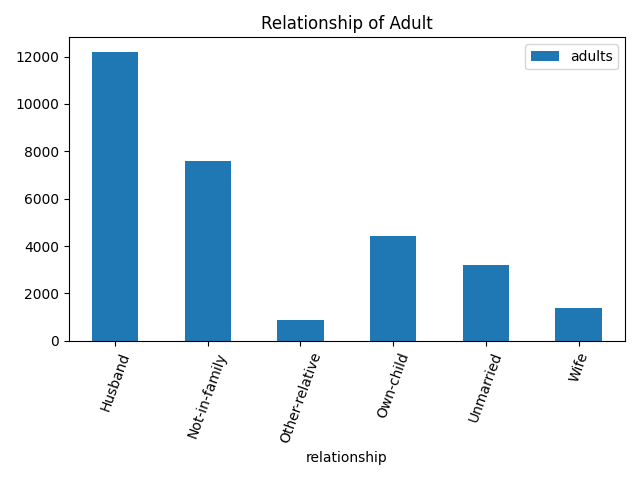

In [54]:
# Drawing barchart for relationship column
data = {"relationship":["Husband", "Not-in-family","Other-relative","Own-child","Unmarried","Wife"],
 "adults":[12202,7596,883,4434,3180,1397]
 };
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="relationship", y="adults", rot=70, title="Relationship of Adult");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt


### Relationship of Adults

After removing the outliers, Husband is still the largest categories of all and followed by not-in-family. The interesting part is that one of the smallest categories is wife. It appears that in this dataset, there is a large possibility that most women working were simply not in a family due to thier jobs or tax status. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

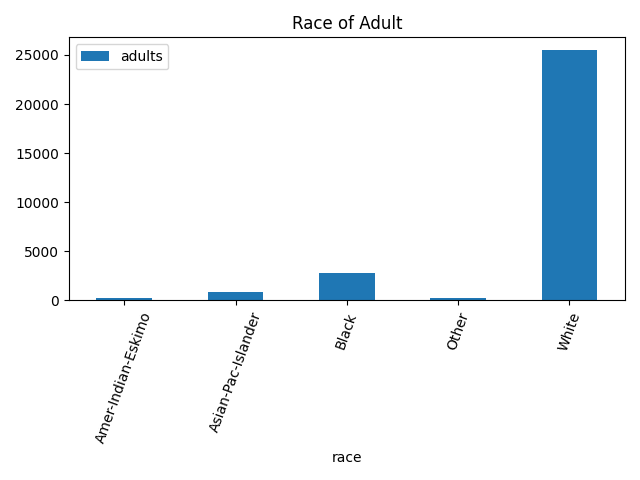

In [55]:
# Drawing barchart for race column
data = {"race":["Amer-Indian-Eskimo","Asian-Pac-Islander","Black","Other","White"],
 "adults":[282,878,2790,228,25514]
 };
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="race", y="adults", rot=70, title="Race of Adult");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt


### Analysis of Race of Adult

After removing the outliers, White population is the most dominant and significantly noticable black popuplation as well. One thing that concerend us is that the number of Asians and Others seems to be pretty low compared to the real population of the United States. There seemed to be an possible error when collecting the data. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

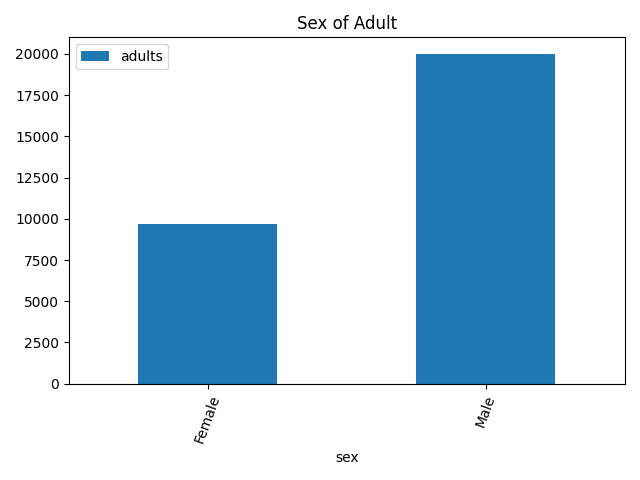

In [56]:
# Drawing barchart for sex column
data = {"sex":["Female","Male"],
 "adults":[9691,20001]
 };
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="sex", y="adults", rot=70, title="Sex of Adult");
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt


### Analysis of Sex of Adult

After removing the outliers, male is still dominant sex and approximately 1/3 of the data is female. 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

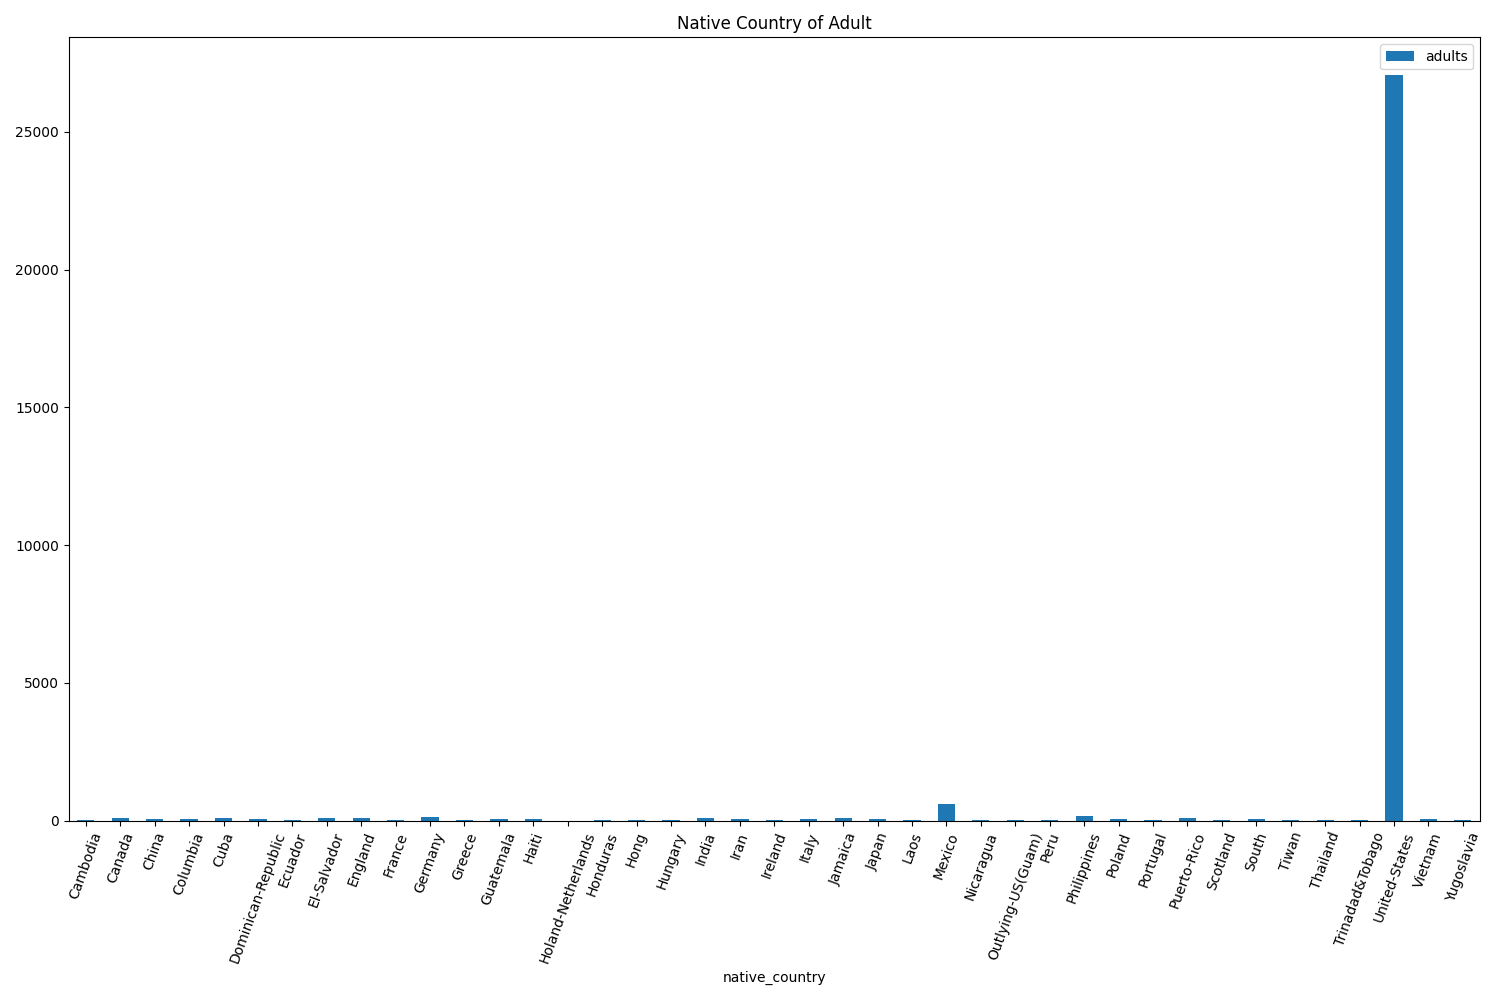

In [57]:
# Drawing barchart for native country column
data = {"native_country":["Cambodia","Canada","China","Columbia","Cuba","Dominican-Republic","Ecuador",
 "El-Salvador","England","France","Germany","Greece","Guatemala","Haiti",
 "Holand-Netherlands","Honduras","Hong","Hungary","India","Iran","Ireland",
 "Italy","Jamaica","Japan","Laos","Mexico","Nicaragua","Outlying-US(Guam)",
 "Peru","Philippines","Poland","Portugal","Puerto-Rico","Scotland","South",
 "Tiwan","Thailand","Trinadad&Tobago","United-States","Vietnam","Yugoslavia"],
 "adults":[18,107,68,56,91,65,26,99,83,26,128,29,61,42,1,12,19,12,99,42,24,66,80,57,17,598,33,14,30,
 185,54,33,107,11,69,41,15,18,27077,63,16]
 };
# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data);
# Draw a vertical bar chart
dataFrame.plot.bar(x="native_country", y="adults", rot=70, title="Native Country of Adult", figsize=(15, 10));
plot.show(block=True);
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing a barchart by using Spark magic
%matplot plt


### Analysis for Native Country of Adults

After removing the outliers, the graph pretty much resembles the same since the overwhelming majority are from United States. There are noticable amount of adults from Mexico and the rest are very little to notice. However, we assumed there is a possiblity that reason why United States is significantly high is becuase many people that are born in the United States with different backgrounds seemed to considered as they are orignially from the United States. 

# Scatter plots after removing outliers

In [58]:
# Converting the spark dataframe to pandas dataframe
pandasdf2 = df_clean3.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

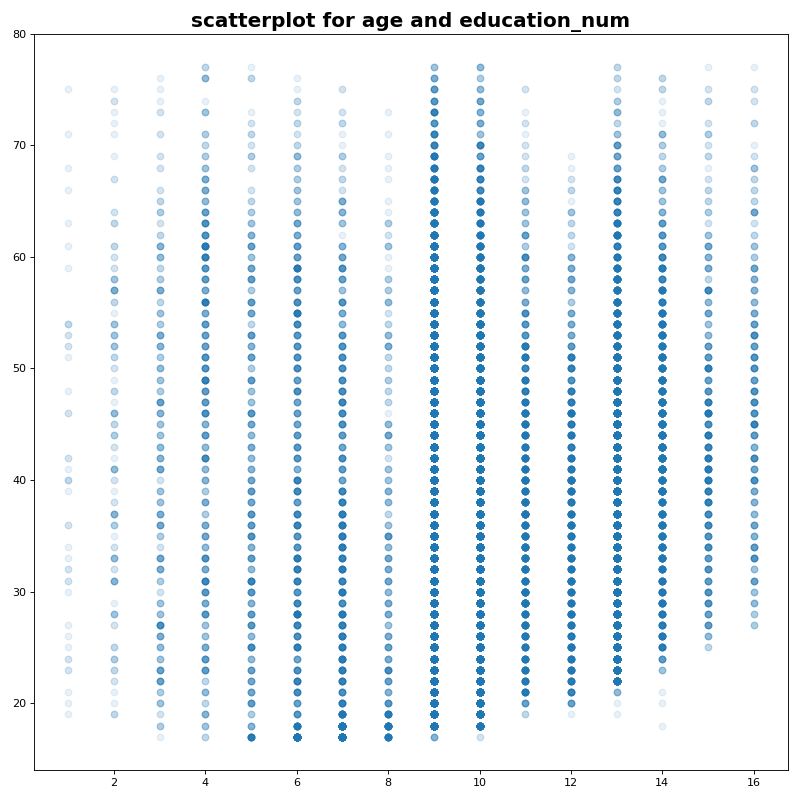

In [62]:
# Drawing scatterplot for age and education_num column
# Setting the figure size and dpi pixels
figure(figsize=(10,10), dpi=80)
# Assigning age column to variable a
a = pandasdf2["age"]
# Assigning education_num column to variable b
b = pandasdf2["education_num"]
# Plotting scatter plot with transparency
plt.scatter (b,a, alpha = 0.1)
# Setting title
plt.title('scatterplot for age and education_num', fontsize=18, fontweight='bold')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing scatter plot using Spark magic
%matplot plt

### Analysis for Age and Education_num Scatter Plot

After the removal of outliers, the graph is much clearer. There seems to be a strong cluster in 9th and 13th (1 year of college) grade. The
graph is still skewed towards more education and there is a distinct fall off with those who are less educated.


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

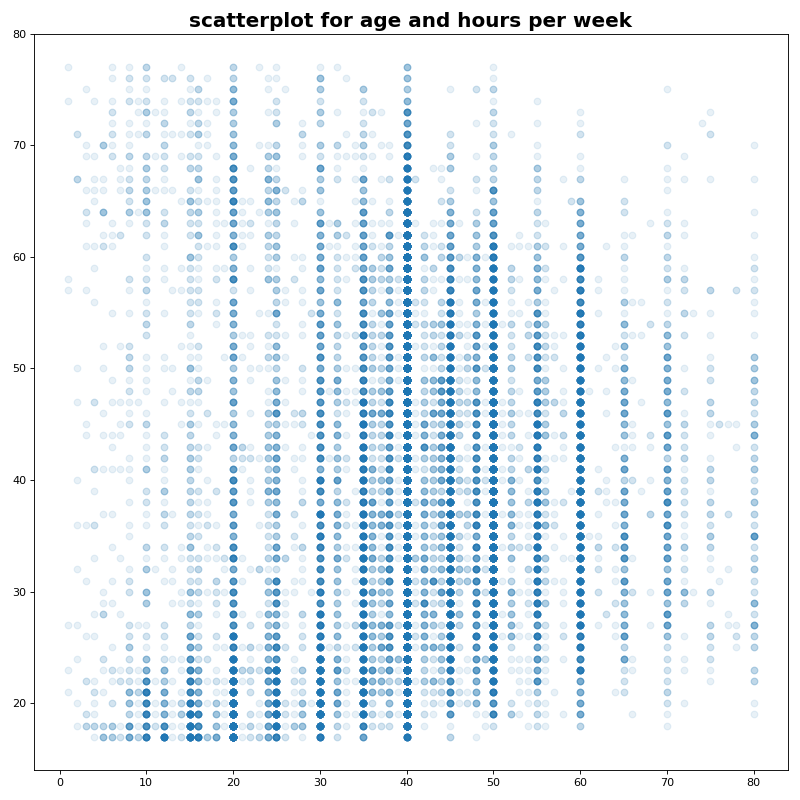

In [60]:
# Drawing scatterplot for age and hours per week column 
# Setting the figure size and dpi pixels
figure(figsize=(10,10), dpi=80)
# Assigning age column to variable a
a = pandasdf2["age"]
# Assigning hours_per_week column to variable b
b = pandasdf2["hours_per_week"]
# Plotting scatter plot with transparency
plt.scatter (b,a, alpha = 0.1)
# Setting title
plt.title('scatterplot for age and hours per week', fontsize=18, fontweight='bold')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing scatter plot using spark magic
%matplot plt

### Analysis for Age and Hours per Week Scatter Plot

After eliminating outliers, the graph has 3 district lines that are much easier to see. There is a strong cluster around 40 hours a week, 50,
and 60. With 40 years, it seems all ages have a strong correlation here. With 50 and 60 hours, the cut off age seems to be 60. Though there
is still the same cluster towards the middle age and 40-50 hours on average, it is much clearer to see the shape of the scatter plot and its
curved growth.


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

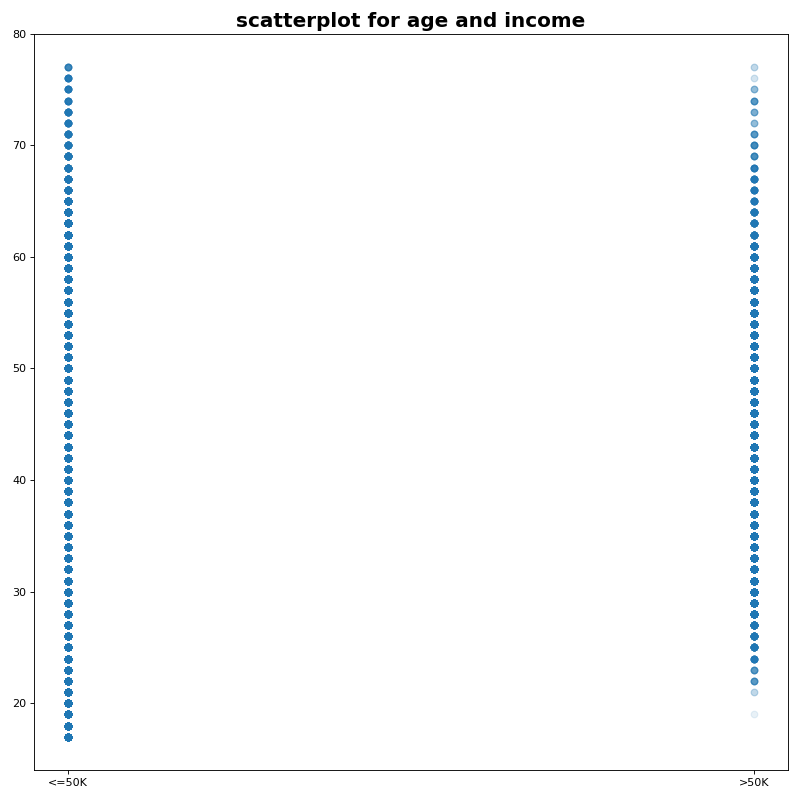

In [63]:
# scatterplot for age and income columns
# Setting the figure size and dpi pixels
figure(figsize=(10,10), dpi=80)
# Assigning age column to variable a
a = pandasdf2["age"]
# Assigning income column to varaible b
b = pandasdf2["income"]
# Plotting scatter plot with transparency
plt.scatter (b,a, alpha = 0.1)
# Setting title
plt.title('scatterplot for age and income', fontsize=18, fontweight='bold')
# Adjusting the padding between and around subplots
plt.tight_layout()
# Drawing scatter plot using spark magic
%matplot plt


### Analysis for Age and Income scatter plot

After removing some outliers, it is much more clearly visible that regardless of age, many people make less than 50K a year and it almost
seems quite uniform in its distribution. On the contrary, it seems middle aged adults have a stronger change to earn more than 50k a year.
There is fall off when it comes to those who are less than 20 years old and those who are over 70. This is most likely due to younger people
not having good jobs since they lack education, and 70 being a year that many people retire and simply collect their pension.